From Raghu:
1. correlation matrix, for each team
2. for each opponent, find wins, loses and ties
3. what was the magnitude of win, loss or tie?
4. For 
* i)win look at conversion, pass diff, poss diff, ruck maul diff etc..
* ii) For loss, same…
* iii) For tie, same…
5. Look at, for ex. against Fiji, lost most matches
6. which other team won most matches against fiji
7. repeat number 4 I) ii) and iii)
*repeat

In [378]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [379]:
df = pd.read_csv('../data/output/final_diffs_all.csv')

In [380]:
df.shape

(156, 14)

In [381]:
# Get layout of data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
Opp                            156 non-null object
Tournament                     156 non-null object
Poss_Time_Diff                 156 non-null float64
Score_Diff                     156 non-null float64
Conv_Diff                      156 non-null float64
Tries_Diff                     156 non-null float64
Passes_Diff                    156 non-null float64
Contestable_KO_Win_pct_Diff    156 non-null float64
PenFK_Against_Diff             156 non-null float64
RuckMaul_Diff                  156 non-null float64
Ruck_Win_pct_Diff              156 non-null float64
Cards_diff                     156 non-null float64
Lineout_Win_Pct_Diff           156 non-null float64
Scrum_Win_Pct_Diff             156 non-null float64
dtypes: float64(12), object(2)
memory usage: 17.1+ KB


In [382]:
#Find NAs
df.isnull().sum()

Opp                            0
Tournament                     0
Poss_Time_Diff                 0
Score_Diff                     0
Conv_Diff                      0
Tries_Diff                     0
Passes_Diff                    0
Contestable_KO_Win_pct_Diff    0
PenFK_Against_Diff             0
RuckMaul_Diff                  0
Ruck_Win_pct_Diff              0
Cards_diff                     0
Lineout_Win_Pct_Diff           0
Scrum_Win_Pct_Diff             0
dtype: int64

In [383]:
# Replace NaN's with zero
df.fillna(value=0, inplace=True)

In [384]:
# look at the distribution of the data
df.describe()

,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,9.903164,10.715017,11.038360,0.012454,16.776721,3.650794,-2.503924,-1.264754,0.060805,5.769231,0.127030,-0.084936
std,20.909780,45.274784,44.420985,0.484497,27.354524,45.643028,49.923676,59.474800,0.200731,27.802030,0.661957,0.631142
min,-43.478261,-100.000000,-100.000000,-1.000000,-58.490566,-166.666667,-100.000000,-100.000000,-0.550000,-50.000000,-1.000000,-1.000000
25%,-3.485695,-17.612570,-20.000000,-0.333333,1.190476,-25.000000,-33.333333,-33.333333,-0.083333,0.000000,0.000000,-0.250000
50%,10.098583,8.391608,0.000000,0.000000,15.767045,0.000000,0.000000,0.000000,0.078144,0.000000,0.000000,0.000000
75%,23.370749,41.248207,42.857143,0.333333,34.435096,33.333333,33.333333,33.333333,0.180871,0.000000,0.750000,0.000000
max,72.272727,100.000000,100.000000,1.000000,90.909091,133.333333,100.000000,100.000000,0.875000,100.000000,1.000000,1.000000


In [385]:
# Head() the dataframe
df.head(5)

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,25.000000,-20.000000,-100.000000,0.250000,0.0,-1.000000,0.0
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-16.666667,66.666667,60.000000,-0.550000,0.0,-1.000000,0.0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,-75.000000,-50.000000,-100.000000,0.250000,0.0,0.000000,-1.0
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,-66.666667,-33.333333,-33.333333,0.208333,0.0,-1.000000,0.0


In [386]:
# create result: win = 1, loss = 0
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)


In [387]:
#check datatypes of all features
df.dtypes

Opp                             object
Tournament                      object
Poss_Time_Diff                 float64
Score_Diff                     float64
Conv_Diff                      float64
Tries_Diff                     float64
Passes_Diff                    float64
Contestable_KO_Win_pct_Diff    float64
PenFK_Against_Diff             float64
RuckMaul_Diff                  float64
Ruck_Win_pct_Diff              float64
Cards_diff                     float64
Lineout_Win_Pct_Diff           float64
Scrum_Win_Pct_Diff             float64
Result                           int64
dtype: object

In [388]:
# Accessing the features (column names)
df.columns

Index(['Opp', 'Tournament', 'Poss_Time_Diff', 'Score_Diff', 'Conv_Diff',
       'Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff',
       'PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff',
       'Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result'],
      dtype='object')

In [389]:
#Get value counts of a column
#Use for any/all columns
df.Ruck_Win_pct_Diff.value_counts()

 0.000000    11
-0.200000     6
 0.333333     6
 0.250000     6
-0.083333     5
 0.285714     5
 0.083333     5
 0.208333     4
 0.111111     4
-0.166667     4
 0.125000     3
 0.142857     3
 0.166667     3
 0.066667     3
 0.200000     3
 0.150000     2
 0.046154     2
-0.133333     2
 0.230769     2
-0.100000     2
 0.090909     2
-0.250000     2
-0.285714     2
-0.125000     2
 0.164835     1
 0.214286     1
-0.174603     1
 0.200000     1
-0.277778     1
 0.100000     1
             ..
 0.146154     1
-0.020833     1
-0.318182     1
 0.159091     1
-0.022222     1
 0.013889     1
-0.242424     1
 0.180556     1
 0.055556     1
 0.111111     1
 0.181818     1
 0.133333     1
-0.068182     1
-0.066667     1
 0.272727     1
 0.166667     1
-0.142857     1
 0.025000     1
 0.050000     1
-0.181818     1
 0.006494     1
 0.217949     1
 0.070707     1
 0.048611     1
 0.152381     1
 0.153846     1
 0.076923     1
 0.114286     1
-0.333333     1
 0.222222     1
Name: Ruck_Win_pct_Diff,

In [390]:
print(df.dtypes)

Opp                             object
Tournament                      object
Poss_Time_Diff                 float64
Score_Diff                     float64
Conv_Diff                      float64
Tries_Diff                     float64
Passes_Diff                    float64
Contestable_KO_Win_pct_Diff    float64
PenFK_Against_Diff             float64
RuckMaul_Diff                  float64
Ruck_Win_pct_Diff              float64
Cards_diff                     float64
Lineout_Win_Pct_Diff           float64
Scrum_Win_Pct_Diff             float64
Result                           int64
dtype: object


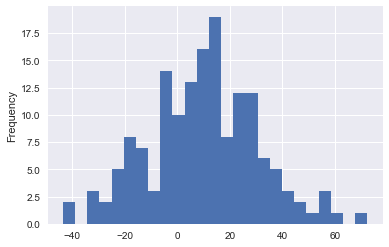

In [391]:
#Plot values for Poss_Time_Diff column
#Use for any/all columns
df.Poss_Time_Diff.plot('hist', bins=25)

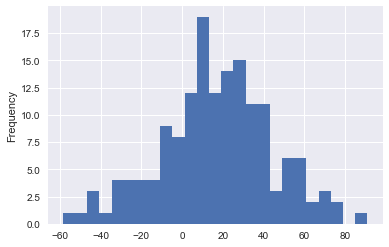

In [392]:
# Passes_Diff
df.Passes_Diff.plot('hist', bins=25)

In [394]:
df.Contestable_KO_Win_pct_Diff.value_counts()

 0.000000      31
-50.000000     12
 50.000000     12
 33.333333     10
-25.000000      7
-66.666667      6
 16.666667      6
 25.000000      5
-33.333333      5
-40.000000      4
 66.666667      4
 20.000000      4
 100.000000     4
-16.666667      4
 40.000000      3
-75.000000      3
 41.666667      2
 75.000000      2
-16.666667      2
 10.000000      2
 42.857143      2
-41.666667      2
-100.000000     2
 60.000000      2
-166.666667     1
-60.000000      1
-8.333333       1
 57.142857      1
-8.333333       1
 15.000000      1
-20.000000      1
 26.666667      1
-46.666667      1
-30.000000      1
 32.142857      1
-10.000000      1
 133.333333     1
 33.333333      1
 46.666667      1
 8.333333       1
 66.666667      1
 16.666667      1
 23.809524      1
 85.714286      1
Name: Contestable_KO_Win_pct_Diff, dtype: int64

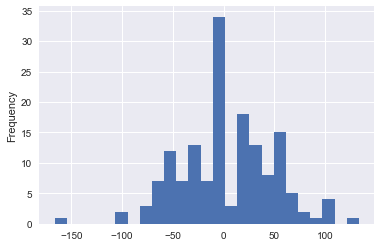

In [395]:
# Contestable KOs
df.Contestable_KO_Win_pct_Diff.plot('hist', bins=25)

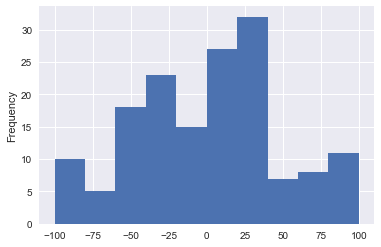

In [421]:
# Pen/FK Against
df.PenFK_Against_Diff.plot('hist', bins=10)

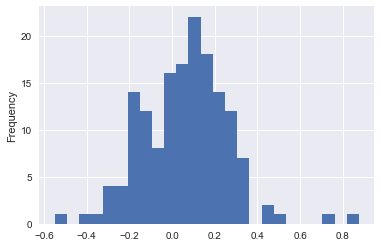

In [397]:
# Rucks Won %
df.Ruck_Win_pct_Diff.plot('hist', bins=25)

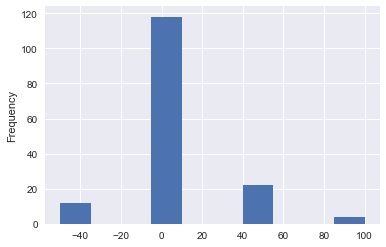

In [422]:
# Cards against
df.Cards_diff.plot('hist', bins=10)

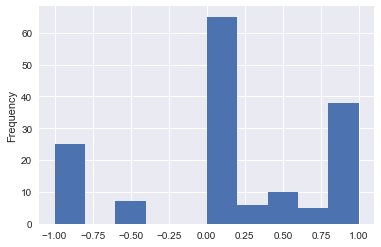

In [423]:
# LO win %
df.Lineout_Win_Pct_Diff.plot('hist', bins=10)

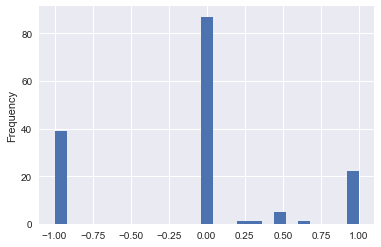

In [400]:
# Scrum win %
df.Scrum_Win_Pct_Diff.plot('hist', bins=25)

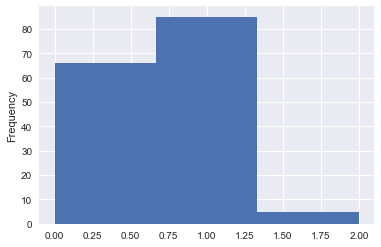

In [401]:
# Result (w/l/t)
df.Result.plot('hist', bins=3)

In [402]:
# Accessing the index (row names)
df.index

RangeIndex(start=0, stop=156, step=1)

## Cleanup

In [403]:
#Coerce Result to Int
df['Result'] = df['Result'].astype(int)

In [404]:
## Apply upper() to 'Opp' column to make all team names uppercase
df['Opp'] = df['Opp'].str.upper()

## Compare Results

In [405]:
#Count wins against opponents
usa_w_opp = df['Opp'][df['Result'] == 1]
usa_l_opp = df['Opp'][df['Result'] == 0]
usa_t_opp = df['Opp'][df['Result'] == 2]
print("USA Wins against opponents") 
print(usa_w_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Losses against opponents") 
print(usa_l_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Ties against opponents")      
print(usa_t_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))

USA Wins against opponents
ARGENTINA       9
WALES           9
SAMOA           7
NEW ZEALAND     7
AUSTRALIA       7
CANADA          6
PORTUGAL        5
FIJI            5
FRANCE          4
RUSSIA          4
SCOTLAND        4
SPAIN           3
JAPAN           3
KENYA           3
ENGLAND         3
SOUTH AFRICA    2
CHILE           1
PNG             1
UGANDA          1
URUGUAY         1
Name: Opp, dtype: int64


USA Losses against opponents
SOUTH AFRICA    12
NEW ZEALAND      8
FIJI             8
ENGLAND          6
SCOTLAND         6
ARGENTINA        5
AUSTRALIA        5
KENYA            4
SAMOA            3
CANADA           3
FRANCE           3
WALES            2
RUSSIA           1
Name: Opp, dtype: int64


USA Ties against opponents
FRANCE    2
CANADA    2
KENYA     1
Name: Opp, dtype: int64


In [406]:
#Get all USA Wins
usa_w = df[df['Result'] == 1]
#Get all USA Losses
usa_l = df[df['Result'] == 0]
#Get all USA Ties
usa_t = df[df['Result'] == 2]

In [407]:
# Create DFs With only numerical values
cols = ['Poss_Time_Diff', 'Score_Diff', 'Conv_Diff','Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result']
#usa_w_num = df[['Poss_Time_Diff', 'Score_Diff', 'Conv_Diff','Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result']]
usa_w_num = usa_w[cols]
usa_l_num = usa_l[cols]
usa_t_num = usa_t[cols]

In [408]:
#Test query
#Select all USA losses against Fiji i.e., 'Result' == 0 (USA's Result)
usa_L_v_fiji = df.query('Opp == "FIJI"')[df.Result == 0]

#get the mean difference in losses to Fiji
usa_L_v_fiji.mean()

print('Mean difference in USA losses to Fiji')
print('\n')
print(usa_L_v_fiji.mean())

Mean difference in USA losses to Fiji


Poss_Time_Diff                  4.051256
Score_Diff                    -26.293572
Conv_Diff                     -23.204365
Tries_Diff                     -0.229167
Passes_Diff                    11.543571
Contestable_KO_Win_pct_Diff     2.916667
PenFK_Against_Diff             -7.539683
RuckMaul_Diff                   6.666667
Ruck_Win_pct_Diff               0.079018
Cards_diff                     18.750000
Lineout_Win_Pct_Diff           -0.187500
Scrum_Win_Pct_Diff              0.000000
Result                          0.000000
dtype: float64


/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [409]:
#Function to iterate through list of opponents and generate mean diff for w,l,t
#for each opponent, find wins, loses and ties
#what was the magnitude of win, loss or tie?

#first, get a list of all opponents
#List unique values in the df['name'] column
opponents = df.Opp.unique()
#coerce to a list
opponents = list(opponents)

tmp = pd.DataFrame(columns=['Opp', 'Poss_Time_Diff', 'Score_Diff', 'Conv_Diff', 'Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff', 'PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff', 'Cards_diff', 'Lineout_Win_Pct_Diff','Scrum_Win_Pct_Diff'])
def oppstats(teams, resultcode):
    """
    get a list of teams and pass in to function
    pass resultcode (0 = loss, 1=win, 2=ties)
    """
    for team in teams:
        #print(team)
        #Select all USA losses against Fiji i.e., 'Result' == 0 (USA's Result)
        #usa_L_v_fiji = df.query('Opp == "FIJI"')[df.Result == 0]
        oppdf = df.query('(Opp == @team) & (Result == @resultcode)')
        """
        print(teams.index(team))
        if resultcode == 0:
            print("Lossese Against")
        elif resultcode == 1:
            print("Wins Against")
        elif resultcode == 2:
            print("Ties With")
        print(team)
        """
        tmp.Opp = teams
        tmp.loc[teams.index(team)] = oppdf.iloc[:, 1:].mean(numeric_only=True)

In [410]:
oppstats(opponents, 1)
#oppstats(opponents, 0)
#oppstats(opponents, 2)
tmp

,Opp,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,23.6099,61.1544,63.4014,-0.0928571,24.2693,23.8095,-20.7483,-2.2449,0.0419218,-7.14286,0.142857,0
1,WALES,12.8134,53.0804,50.4762,0.348942,16.2122,20.5556,13.4392,-11.1111,0.187488,0,0.277778,-0.111111
2,KENYA,10.7523,45,44.4444,0.313492,18.3457,14.2857,-25.7576,-23.3333,-0.00277778,0,0.555556,-0.666667
3,NEW ZEALAND,16.9859,49.5681,46.5986,0.264286,20.8021,-41.6667,-14.898,-19.8639,0.0779494,21.4286,0.285714,-0.142857
4,FIJI,34.2088,30.8984,34.381,-0.283333,46.6981,8.33333,-48.1905,37.1429,0.248333,30,0.366667,0.3
5,PORTUGAL,21.9447,59.1815,56.6667,0.309524,32.9676,11.4286,16.2222,-1.33333,0.103954,-20,0.233333,0.333333
6,FRANCE,21.724,32.8659,35.7143,-0.191667,26.4541,19.1667,-10,-13.3333,0.113095,37.5,0.0833333,0
7,SOUTH AFRICA,2.30798,19.1667,16.6667,0.166667,1.42857,-12.5,-66.6667,-66.6667,-0.0100524,25,0.75,0.75
8,ENGLAND,15.1108,31.1021,35.5556,-0.377778,21.9927,16.6667,5,7.14286,0.147547,0,-0.333333,-0.25
9,RUSSIA,4.84569,49.3896,44.7619,0.4375,5.00114,53.4524,36.25,37.5,0.0912088,-12.5,-0.125,0


In [411]:
tmp.Contestable_KO_Win_pct_Diff.dtype

dtype('O')

In [424]:
print(*opponents)
print(opponents[-1])

AUSTRALIA WALES KENYA NEW ZEALAND FIJI PORTUGAL FRANCE SOUTH AFRICA ENGLAND RUSSIA SCOTLAND UGANDA SAMOA ARGENTINA CANADA JAPAN CHILE PNG SPAIN URUGUAY
URUGUAY


In [413]:
df.query('Opp == "AUSTRALIA"')[df.Result == 0]

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,-50.000000,0.000000,0.000000,0.083333,50.0,0.333333,1.0,0
67,AUSTRALIA,2016_Wellington,12.935323,-54.545455,-50.000000,-0.333333,22.857143,0.000000,7.692308,0.000000,-0.216667,0.0,0.250000,0.0,0
72,AUSTRALIA,2017_Hong_Kong,-2.232143,-15.555556,-14.285714,-0.083333,-8.196721,25.000000,-60.000000,-33.333333,0.272727,0.0,-1.000000,0.0,0
123,AUSTRALIA,2017-18_Sydney_7s,6.888361,-15.555556,-14.285714,-0.083333,31.147541,-30.000000,60.000000,33.333333,-0.116667,0.0,-0.500000,-1.0,0
125,AUSTRALIA,2018_Vancouver_7s,19.685039,-19.230769,-25.000000,0.400000,38.461538,16.666667,33.333333,0.000000,0.000000,0.0,0.000000,0.0,0


## Plotting

In [414]:
#correlation matrix, for each team


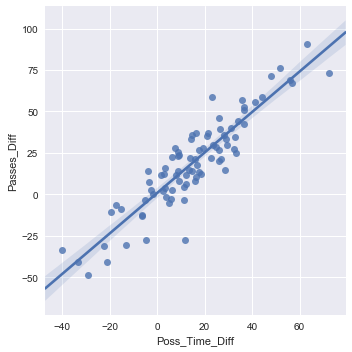

In [415]:
#Test
#sns.palplot(sns.color_palette("RdBu"))
sns.lmplot(data=usa_w_num, x='Poss_Time_Diff', y='Passes_Diff', legend=True, palette="RdBu")

## Visualize Relationships between Variables

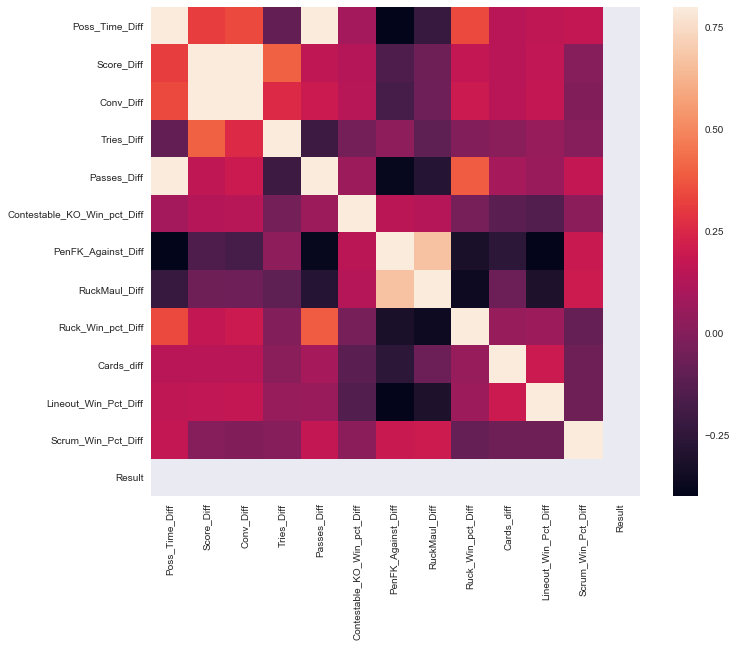

In [416]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for USA wins

corrmat = usa_w_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

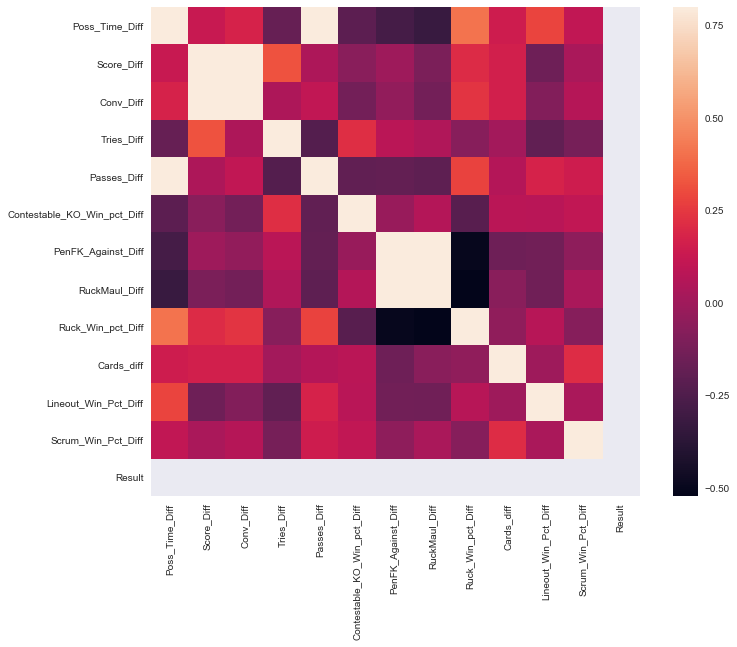

In [417]:
#Correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for USA losses

corrmat = usa_l_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

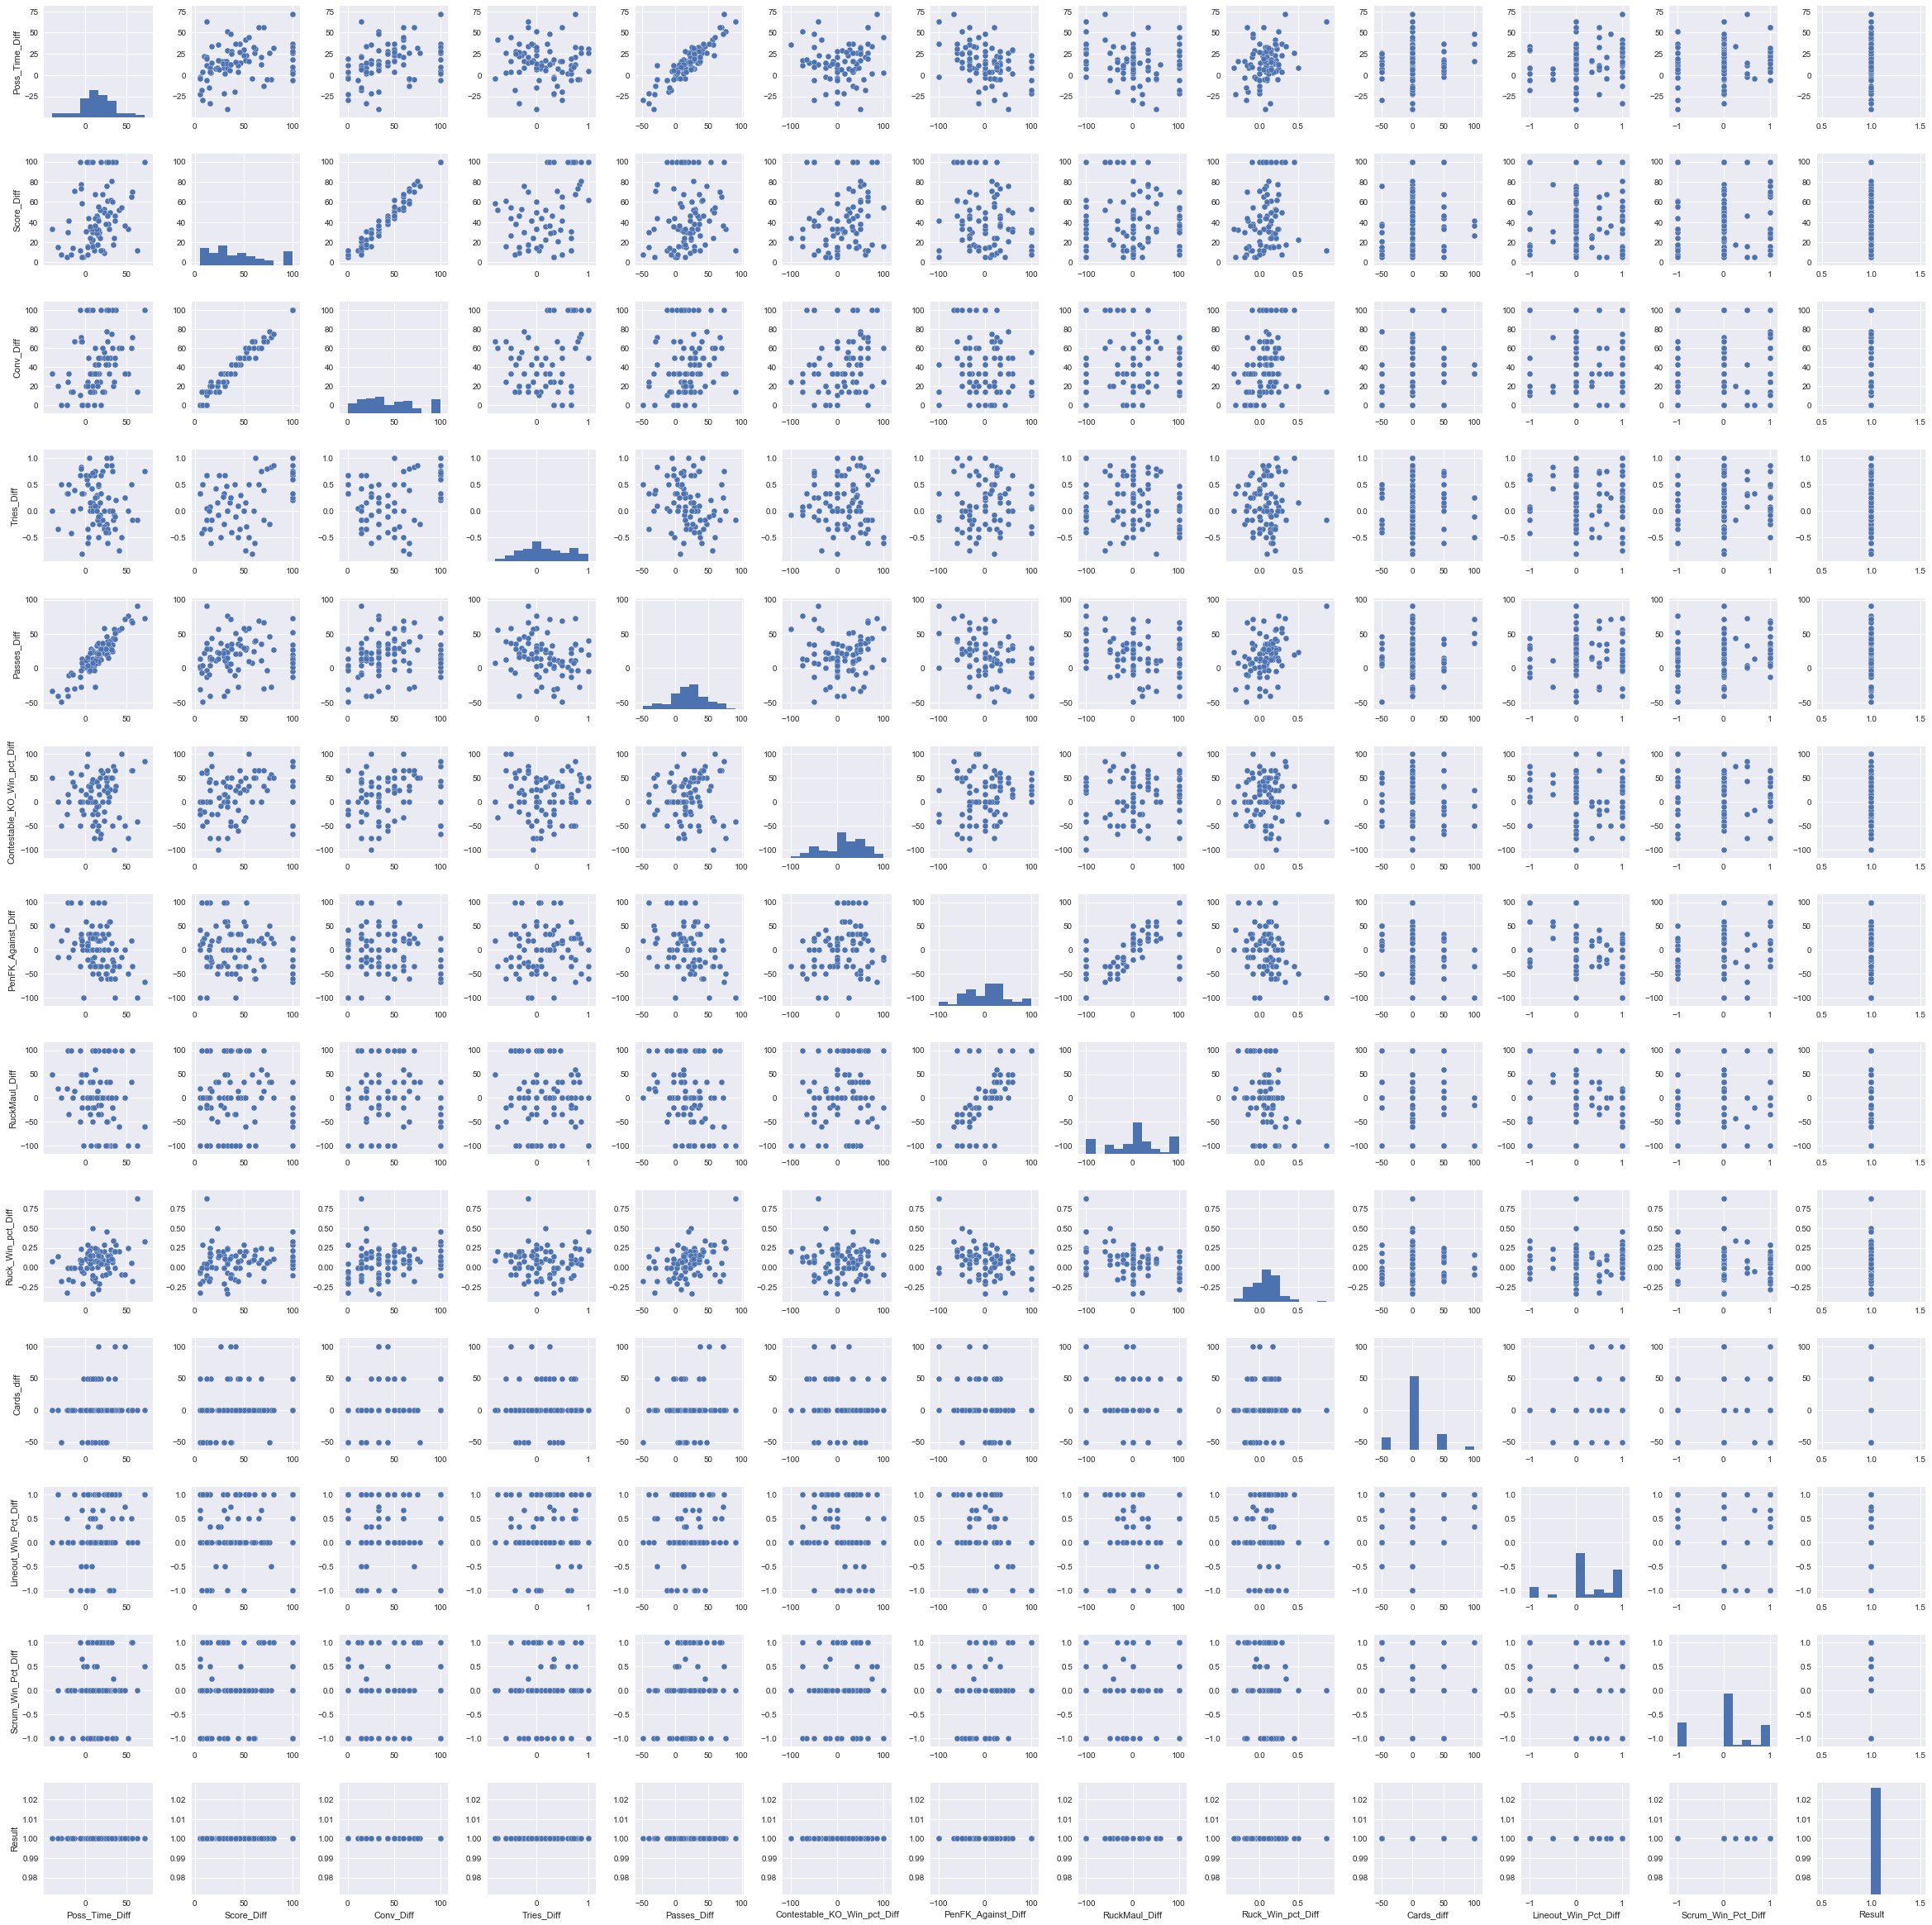

In [418]:
#Create a pairplot for all numeric variables
sns.pairplot(usa_w_num)
plt.show()

# Correlations
* Poss_Time_Diff and Passes_Diff appear to be strongly correlated
* Pen_FL_agains and RuckMaul_Diff appear to be strongly correlated